## <p style="font-size:32px;text-align:center"> <b>Social network Graph Link Prediction - Facebook Challenge</b> </p>

<font color = 'red'>Note: Please consider the code from the heading Assignments. My Code is appended in the same notebook that is provided</font>

In [1]:
#Importing Libraries
# please do go through this python notebook: 
import warnings
warnings.filterwarnings("ignore")

import csv
import pandas as pd#pandas to create small dataframes 
import datetime #Convert to unix time
import time #Convert to unix time
# if numpy is not installed already : pip3 install numpy
import numpy as np#Do aritmetic operations on arrays
# matplotlib: used to plot graphs
import matplotlib
import matplotlib.pylab as plt
import seaborn as sns#Plots
from matplotlib import rcParams#Size of plots  
from sklearn.cluster import MiniBatchKMeans, KMeans#Clustering
import math
import pickle
import os
# to install xgboost: pip3 install xgboost
import xgboost as xgb

import warnings
import networkx as nx
import pdb
import pickle
from pandas import HDFStore,DataFrame
from pandas import read_hdf
from scipy.sparse.linalg import svds, eigs
import gc
from tqdm import tqdm
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score 

from sklearn.model_selection import RandomizedSearchCV
from datetime import datetime

In [2]:
# reading
from pandas import read_hdf
df_final_train = read_hdf('storage_sample_stage4.h5', 'train_df',mode='r')
df_final_test = read_hdf('storage_sample_stage4.h5', 'test_df',mode='r')

In [3]:
df_final_train.columns 

Index(['source_node', 'destination_node', 'indicator_link',
       'jaccard_followers', 'jaccard_followees', 'cosine_followers',
       'cosine_followees', 'num_followers_s', 'num_followees_s',
       'num_followees_d', 'inter_followers', 'inter_followees', 'adar_index',
       'follows_back', 'same_comp', 'shortest_path', 'weight_in', 'weight_out',
       'weight_f1', 'weight_f2', 'weight_f3', 'weight_f4', 'page_rank_s',
       'page_rank_d', 'katz_s', 'katz_d', 'hubs_s', 'hubs_d', 'authorities_s',
       'authorities_d', 'svd_u_s_1', 'svd_u_s_2', 'svd_u_s_3', 'svd_u_s_4',
       'svd_u_s_5', 'svd_u_s_6', 'svd_u_d_1', 'svd_u_d_2', 'svd_u_d_3',
       'svd_u_d_4', 'svd_u_d_5', 'svd_u_d_6', 'svd_v_s_1', 'svd_v_s_2',
       'svd_v_s_3', 'svd_v_s_4', 'svd_v_s_5', 'svd_v_s_6', 'svd_v_d_1',
       'svd_v_d_2', 'svd_v_d_3', 'svd_v_d_4', 'svd_v_d_5', 'svd_v_d_6'],
      dtype='object')

In [ ]:
y_train = df_final_train.indicator_link
y_test = df_final_test.indicator_link

In [ ]:
df_final_train.drop(['source_node', 'destination_node','indicator_link'],axis=1,inplace=True)
df_final_test.drop(['source_node', 'destination_node','indicator_link'],axis=1,inplace=True)

Estimators =  10 Train Score 0.9063252121775113 test Score 0.8745605278006858
Estimators =  50 Train Score 0.9205725512208812 test Score 0.9125653355634538
Estimators =  100 Train Score 0.9238690848446947 test Score 0.9141199714153599
Estimators =  250 Train Score 0.9239789348046863 test Score 0.9188007232664732
Estimators =  450 Train Score 0.9237190618658074 test Score 0.9161507685828595


Text(0.5,1,'Estimators vs score at depth of 5')

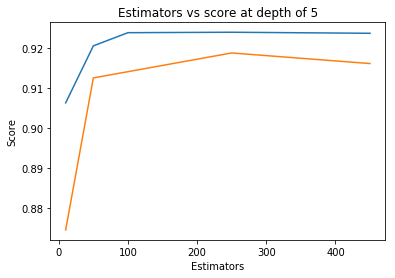

In [ ]:
estimators = [10,50,100,250,450]
train_scores = []
test_scores = []
for i in estimators:
    clf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=52, min_samples_split=120,
            min_weight_fraction_leaf=0.0, n_estimators=i, n_jobs=-1,random_state=25,verbose=0,warm_start=False)
    clf.fit(df_final_train,y_train)
    train_sc = f1_score(y_train,clf.predict(df_final_train))
    test_sc = f1_score(y_test,clf.predict(df_final_test))
    test_scores.append(test_sc)
    train_scores.append(train_sc)
    print('Estimators = ',i,'Train Score',train_sc,'test Score',test_sc)
plt.plot(estimators,train_scores,label='Train Score')
plt.plot(estimators,test_scores,label='Test Score')
plt.xlabel('Estimators')
plt.ylabel('Score')
plt.title('Estimators vs score at depth of 5')

depth =  3 Train Score 0.8916120853581238 test Score 0.8687934859875491
depth =  9 Train Score 0.9572226298198419 test Score 0.9222953031452904
depth =  11 Train Score 0.9623451340902863 test Score 0.9252318758281279
depth =  15 Train Score 0.9634267621927706 test Score 0.9231288356496615
depth =  20 Train Score 0.9631629153051491 test Score 0.9235051024711141
depth =  35 Train Score 0.9634333127085721 test Score 0.9235601652753184
depth =  50 Train Score 0.9634333127085721 test Score 0.9235601652753184
depth =  70 Train Score 0.9634333127085721 test Score 0.9235601652753184
depth =  130 Train Score 0.9634333127085721 test Score 0.9235601652753184


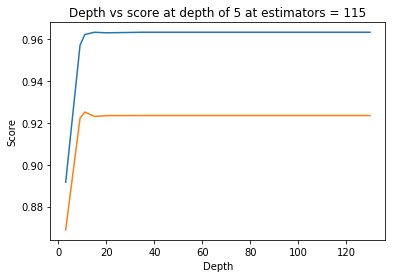

In [ ]:
depths = [3,9,11,15,20,35,50,70,130]
train_scores = []
test_scores = []
for i in depths:
    clf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=i, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=52, min_samples_split=120,
            min_weight_fraction_leaf=0.0, n_estimators=115, n_jobs=-1,random_state=25,verbose=0,warm_start=False)
    clf.fit(df_final_train,y_train)
    train_sc = f1_score(y_train,clf.predict(df_final_train))
    test_sc = f1_score(y_test,clf.predict(df_final_test))
    test_scores.append(test_sc)
    train_scores.append(train_sc)
    print('depth = ',i,'Train Score',train_sc,'test Score',test_sc)
plt.plot(depths,train_scores,label='Train Score')
plt.plot(depths,test_scores,label='Test Score')
plt.xlabel('Depth')
plt.ylabel('Score')
plt.title('Depth vs score at depth of 5 at estimators = 115')
plt.show()

In [ ]:
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint
from scipy.stats import uniform

param_dist = {"n_estimators":sp_randint(105,125),
              "max_depth": sp_randint(10,15),
              "min_samples_split": sp_randint(110,190),
              "min_samples_leaf": sp_randint(25,65)}

clf = RandomForestClassifier(random_state=25,n_jobs=-1)

rf_random = RandomizedSearchCV(clf, param_distributions=param_dist,
                                   n_iter=5,cv=10,scoring='f1',random_state=25)

rf_random.fit(df_final_train,y_train)
print('mean test scores',rf_random.cv_results_['mean_test_score'])
print('mean train scores',rf_random.cv_results_['mean_train_score'])

mean test scores [0.96225043 0.96215493 0.96057081 0.96194015 0.96330005]
mean train scores [0.96294922 0.96266735 0.96115674 0.96263457 0.96430539]


In [ ]:
print(rf_random.best_estimator_)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=14, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=28, min_samples_split=111,
            min_weight_fraction_leaf=0.0, n_estimators=121, n_jobs=-1,
            oob_score=False, random_state=25, verbose=0, warm_start=False)


In [ ]:
clf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=14, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=28, min_samples_split=111,
            min_weight_fraction_leaf=0.0, n_estimators=121, n_jobs=-1,
            oob_score=False, random_state=25, verbose=0, warm_start=False)

In [ ]:
clf.fit(df_final_train,y_train)
y_train_pred = clf.predict(df_final_train)
y_test_pred = clf.predict(df_final_test)

In [ ]:
from sklearn.metrics import f1_score
print('Train f1 score',f1_score(y_train,y_train_pred))
print('Test f1 score',f1_score(y_test,y_test_pred))

Train f1 score 0.9652533106548414
Test f1 score 0.9241678239279553


In [32]:
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    
    A =(((C.T)/(C.sum(axis=1))).T)
    
    B =(C/C.sum(axis=0))
    plt.figure(figsize=(20,4))
    
    labels = [0,1]
    # representing A in heatmap format
    cmap=sns.light_palette("blue")
    plt.subplot(1, 3, 1)
    sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Confusion matrix")
    
    plt.subplot(1, 3, 2)
    sns.heatmap(B, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Precision matrix")
    
    plt.subplot(1, 3, 3)
    # representing B in heatmap format
    sns.heatmap(A, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Recall matrix")
    plt.show()


Train confusion_matrix


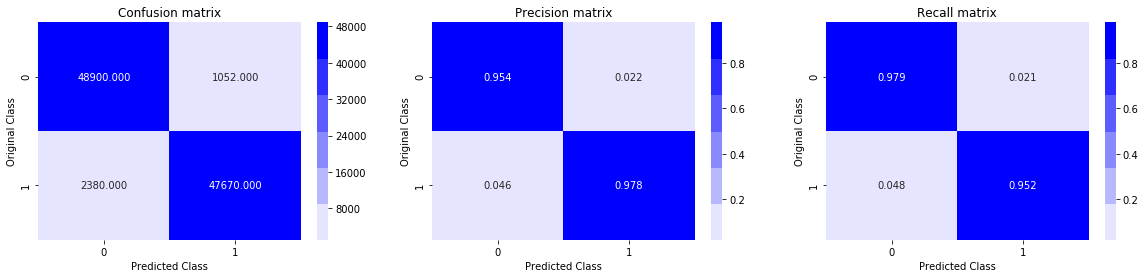

Test confusion_matrix


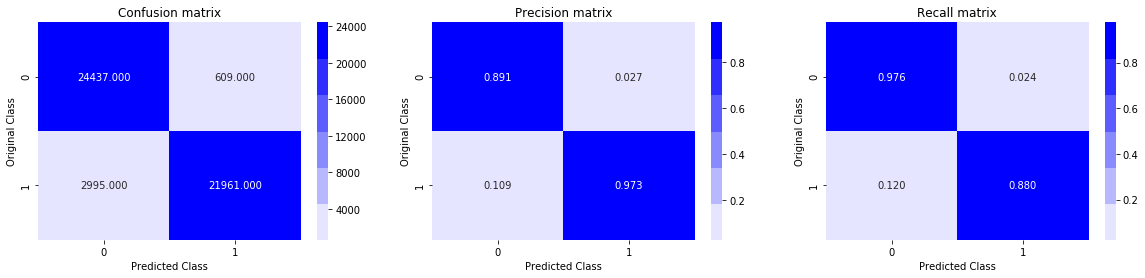

In [ ]:
print('Train confusion_matrix')
plot_confusion_matrix(y_train,y_train_pred)
print('Test confusion_matrix')
plot_confusion_matrix(y_test,y_test_pred)

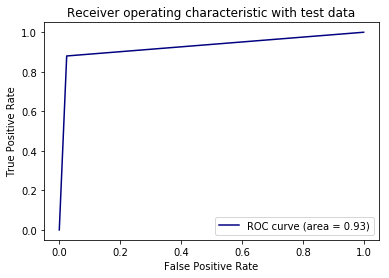

In [ ]:
from sklearn.metrics import roc_curve, auc
fpr,tpr,ths = roc_curve(y_test,y_test_pred)
auc_sc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='navy',label='ROC curve (area = %0.2f)' % auc_sc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic with test data')
plt.legend()
plt.show()

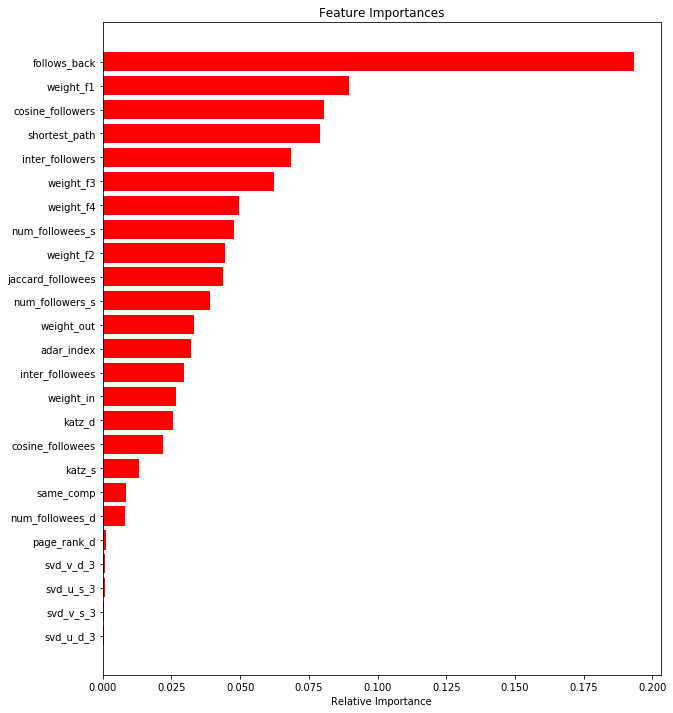

In [ ]:
features = df_final_train.columns
importances = clf.feature_importances_
indices = (np.argsort(importances))[-25:]
plt.figure(figsize=(10,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='r', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

# Assignments:

1. Add another feature called  Preferential Attachment  with followers and followees data of vertex. you can check about Preferential Attachment in below link
http://be.amazd.com/link-prediction/ <br>
2. Add  feature called svd_dot. you can calculate svd_dot as Dot product between source node svd and destination node svd features.  you can read about this in below pdf 
https://storage.googleapis.com/kaggle-forum-message-attachments/2594/supervised_link_prediction.pdf<br>
3. Tune hyperparameters for XG boost with all these features and check the error metric.

## Preferential Attachment:   [link](http://be.amazd.com/link-prediction/)

Preferential Attachment One well-known concept in social networks is that users with many friends tend to create more connections in the future.
This is due to the fact that in some social networks, like in finance, the rich get richer. We estimate how ”rich” our two vertices are by calculating 
the multiplication between the number of friends (|Γ(x)|) or followers each vertex has. It may be noted that the similarity index does not require any
node neighbor information; therefore, this similarity index has the lowest computational complexity.



```
score(X,Y) = followers(X) * followers(Y)
```



In [4]:
#reading
from pandas import read_hdf
df_final_train = read_hdf('storage_sample_stage4.h5', 'train_df',mode='r')
df_final_test = read_hdf('storage_sample_stage4.h5', 'test_df',mode='r')

In [5]:
df_final_train.columns 

Index(['source_node', 'destination_node', 'indicator_link',
       'jaccard_followers', 'jaccard_followees', 'cosine_followers',
       'cosine_followees', 'num_followers_s', 'num_followees_s',
       'num_followees_d', 'inter_followers', 'inter_followees', 'adar_index',
       'follows_back', 'same_comp', 'shortest_path', 'weight_in', 'weight_out',
       'weight_f1', 'weight_f2', 'weight_f3', 'weight_f4', 'page_rank_s',
       'page_rank_d', 'katz_s', 'katz_d', 'hubs_s', 'hubs_d', 'authorities_s',
       'authorities_d', 'svd_u_s_1', 'svd_u_s_2', 'svd_u_s_3', 'svd_u_s_4',
       'svd_u_s_5', 'svd_u_s_6', 'svd_u_d_1', 'svd_u_d_2', 'svd_u_d_3',
       'svd_u_d_4', 'svd_u_d_5', 'svd_u_d_6', 'svd_v_s_1', 'svd_v_s_2',
       'svd_v_s_3', 'svd_v_s_4', 'svd_v_s_5', 'svd_v_s_6', 'svd_v_d_1',
       'svd_v_d_2', 'svd_v_d_3', 'svd_v_d_4', 'svd_v_d_5', 'svd_v_d_6'],
      dtype='object')

In [6]:
# Getting train graph data
if os.path.isfile('train_pos_after_eda.csv'):
    train_graph=nx.read_edgelist('train_pos_after_eda.csv',delimiter=',',create_using=nx.DiGraph(),nodetype=int)
    print(nx.info(train_graph))
else:
    print("please run the FB_EDA.ipynb or download the files from drive")

Name: 
Type: DiGraph
Number of nodes: 1780722
Number of edges: 7550015
Average in degree:   4.2399
Average out degree:   4.2399


In [7]:
def preferential_attachment_followers(a,b):
    try:
        if len(set(train_graph.predecessors(a))) == 0  | len(set(train_graph.predecessors(b))) == 0:
            return 0
        score =  len(set(train_graph.predecessors(a))) * len(set(train_graph.predecessors(b)))
        return score
    except:
        return 0 

In [8]:
def preferential_attachment_followees(a,b):
    try:
        if len(set(train_graph.successors(a))) == 0  | len(set(train_graph.successors(b))) == 0:
            return 0
        score =  len(set(train_graph.successors(a))) * len(set(train_graph.successors(b)))
        return score
    except:
        return 0 

In [9]:
#mapping preferential_attachment followers and followees score on train
df_final_train['pref_attach_followers'] = df_final_train.apply(lambda row:\
                                        preferential_attachment_followers(row['source_node'],row['destination_node']),axis=1)

df_final_train['pref_attach_followees'] = df_final_train.apply(lambda row:\
                                        preferential_attachment_followees(row['source_node'],row['destination_node']),axis=1)


#mapping preferential_attachment followers and followees score on test
df_final_test['pref_attach_followers'] = df_final_test.apply(lambda row:\
                                        preferential_attachment_followers(row['source_node'],row['destination_node']),axis=1)

df_final_test['pref_attach_followees'] = df_final_test.apply(lambda row:\
                                        preferential_attachment_followees(row['source_node'],row['destination_node']),axis=1)

In [10]:
# print(df_final_train.columns)
# print(df_final_test.columns)

## SVD dot


__we will create these each of these features for both train and test data points__
<ol>
<li>SVD dot value for each (source,destination) pair</li>
</ol>

In [11]:
def svd(x, S):
    try:
        z = sadj_dict[x]
        return S[z]
    except:
        return [0,0,0,0,0,0]

In [12]:
#for svd features to get feature vector creating a dict node val and inedx in svd vector
sadj_col = sorted(train_graph.nodes())
sadj_dict = { val:idx for idx,val in enumerate(sadj_col)}

In [13]:
Adj = nx.adjacency_matrix(train_graph,nodelist=sorted(train_graph.nodes())).asfptype()

In [14]:
U, s, VT = svds(Adj, k = 6)
print('Adjacency matrix Shape',Adj.shape)
print('U Shape',U.shape)
print('VT Shape',VT.shape)
print('s Shape',s.shape)

Adjacency matrix Shape (1780722, 1780722)
U Shape (1780722, 6)
VT Shape (6, 1780722)
s Shape (6,)


**Logic:**

svd_dot_u = (svd_u_s_1 * svd_u_d_1) + (svd_u_s_2 * svd_u_d_2) + . . . . + (svd_u_s_6 * svd_u_d_6)

svd_dot_v = (svd_v_s_1 * svd_v_d_1) + (svd_v_s_2 * svd_v_d_2) + . . . . + (svd_v_s_6 * svd_v_d_6)

In [15]:
# Mapping svd_dot score to train
df_final_train['svd_source_u'] = df_final_train.source_node.apply(lambda x: svd(x, U))
df_final_train['svd_destination_u'] = df_final_train.destination_node.apply(lambda x: svd(x, U))

df_final_train['svd_source_v'] = df_final_train.source_node.apply(lambda x: svd(x, VT.T))
df_final_train['svd_destination_v'] = df_final_train.destination_node.apply(lambda x: svd(x, VT.T))

# computing dotproduct for U vectors and V vectors for train set
df_final_train['svd_dot_u'] = df_final_train.apply(lambda row: np.dot( row['svd_source_u'],row['svd_destination_u']) , axis =1)
df_final_train['svd_dot_v'] = df_final_train.apply(lambda row: np.dot( row['svd_source_v'],row['svd_destination_v']) , axis =1)


In [16]:
# Mapping svd_dot score to test
df_final_test['svd_source_u'] = df_final_test.source_node.apply(lambda x: svd(x, U))
df_final_test['svd_destination_u'] = df_final_test.destination_node.apply(lambda x: svd(x, U))

df_final_test['svd_source_v'] = df_final_test.source_node.apply(lambda x: svd(x, VT.T))
df_final_test['svd_destination_v'] = df_final_test.destination_node.apply(lambda x: svd(x, VT.T))

# computing dotproduct for U vectors and V vectors for test set
df_final_test['svd_dot_u'] = df_final_test.apply(lambda row: np.dot( row['svd_source_u'],row['svd_destination_u']) , axis =1)
df_final_test['svd_dot_v'] = df_final_test.apply(lambda row: np.dot( row['svd_source_v'],row['svd_destination_v']) , axis =1)


In [18]:
#Dropping all the unneccesary columns from train and test dataframes
columns_list = ['svd_source_u','svd_destination_u', 'svd_source_v', 'svd_destination_v']

df_final_train.drop( labels = columns_list, axis =1, inplace = True)
df_final_test.drop( labels = columns_list, axis =1, inplace = True)

print(df_final_train.columns)

Index(['source_node', 'destination_node', 'indicator_link',
       'jaccard_followers', 'jaccard_followees', 'cosine_followers',
       'cosine_followees', 'num_followers_s', 'num_followees_s',
       'num_followees_d', 'inter_followers', 'inter_followees', 'adar_index',
       'follows_back', 'same_comp', 'shortest_path', 'weight_in', 'weight_out',
       'weight_f1', 'weight_f2', 'weight_f3', 'weight_f4', 'page_rank_s',
       'page_rank_d', 'katz_s', 'katz_d', 'hubs_s', 'hubs_d', 'authorities_s',
       'authorities_d', 'svd_u_s_1', 'svd_u_s_2', 'svd_u_s_3', 'svd_u_s_4',
       'svd_u_s_5', 'svd_u_s_6', 'svd_u_d_1', 'svd_u_d_2', 'svd_u_d_3',
       'svd_u_d_4', 'svd_u_d_5', 'svd_u_d_6', 'svd_v_s_1', 'svd_v_s_2',
       'svd_v_s_3', 'svd_v_s_4', 'svd_v_s_5', 'svd_v_s_6', 'svd_v_d_1',
       'svd_v_d_2', 'svd_v_d_3', 'svd_v_d_4', 'svd_v_d_5', 'svd_v_d_6',
       'pref_attach_followers', 'pref_attach_followees', 'svd_dot_u',
       'svd_dot_v'],
      dtype='object')


In [38]:
print(df_final_test.columns)

Index(['jaccard_followers', 'jaccard_followees', 'cosine_followers',
       'cosine_followees', 'num_followers_s', 'num_followees_s',
       'num_followees_d', 'inter_followers', 'inter_followees', 'adar_index',
       'follows_back', 'same_comp', 'shortest_path', 'weight_in', 'weight_out',
       'weight_f1', 'weight_f2', 'weight_f3', 'weight_f4', 'page_rank_s',
       'page_rank_d', 'katz_s', 'katz_d', 'hubs_s', 'hubs_d', 'authorities_s',
       'authorities_d', 'svd_u_s_1', 'svd_u_s_2', 'svd_u_s_3', 'svd_u_s_4',
       'svd_u_s_5', 'svd_u_s_6', 'svd_u_d_1', 'svd_u_d_2', 'svd_u_d_3',
       'svd_u_d_4', 'svd_u_d_5', 'svd_u_d_6', 'svd_v_s_1', 'svd_v_s_2',
       'svd_v_s_3', 'svd_v_s_4', 'svd_v_s_5', 'svd_v_s_6', 'svd_v_d_1',
       'svd_v_d_2', 'svd_v_d_3', 'svd_v_d_4', 'svd_v_d_5', 'svd_v_d_6',
       'pref_attach_followers', 'pref_attach_followees', 'svd_dot_u',
       'svd_dot_v'],
      dtype='object')


In [19]:
y_train = df_final_train.indicator_link
y_test = df_final_test.indicator_link 

In [20]:
df_final_train.drop(['source_node', 'destination_node','indicator_link'],axis=1,inplace=True)
df_final_test.drop(['source_node', 'destination_node','indicator_link'],axis=1,inplace=True)

## Modeling

## xgb.XGBClassifier -- 2

In [21]:
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score

In [22]:
start = datetime.now()
bst = xgb.XGBClassifier(objective='binary:logistic')
# https://gist.github.com/wrwr/3f6b66bf4ee01bf48be965f60d14454d

params = {
          'max_depth': [6, 10, 15, 20],
          'learning_rate': [0.001, 0.01, 0.1, 0.2, 0,3],
          'subsample': [0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
          'colsample_bytree': [0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
          'colsample_bylevel': [0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
          'min_child_weight': [0.5, 1.0, 3.0, 5.0, 7.0, 10.0],
          'gamma': [0, 0.25, 0.5, 1.0],
          'reg_lambda': [0.1, 1.0, 5.0, 10.0, 50.0, 100.0],
          'n_estimators': [x for x in range(5,50+1,5)]
        }

clf  = RandomizedSearchCV(bst, params, n_iter=15 ,cv=5, scoring='roc_auc' )  #bst is important here don't write clf

clf.fit(df_final_train,y_train)

print('time consumed to train this model: ',datetime.now()- start)

time consumed to train this model:  0:14:11.509025


In [23]:
results = pd.DataFrame(clf.cv_results_)
results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_subsample,param_reg_lambda,param_n_estimators,param_min_child_weight,param_max_depth,param_learning_rate,param_gamma,param_colsample_bytree,param_colsample_bylevel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,4.466244,0.041583,0.040670,0.000321,0.9,0.1,20,3,6,0.01,0.5,1,0.4,"{'subsample': 0.9, 'reg_lambda': 0.1, 'n_estim...",0.988980,0.990042,0.988929,0.989775,0.990338,0.989613,0.000566,12
1,2.776852,0.026580,0.034208,0.000239,0.8,1,10,1,6,0.1,0,0.7,0.7,"{'subsample': 0.8, 'reg_lambda': 1.0, 'n_estim...",0.991647,0.993014,0.992778,0.992739,0.992489,0.992534,0.000473,10
2,13.033150,0.438723,0.072909,0.001925,0.6,50,30,3,20,0.1,0,0.4,1,"{'subsample': 0.6, 'reg_lambda': 50.0, 'n_esti...",0.996952,0.997325,0.996014,0.996358,0.996134,0.996557,0.000502,6
3,2.820912,0.056684,0.030692,0.000385,0.8,50,5,10,15,0,1,0.8,0.8,"{'subsample': 0.8, 'reg_lambda': 50.0, 'n_esti...",0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.000000,13
4,28.036910,0.173467,0.077949,0.001404,1,50,45,7,20,0.1,0.5,0.9,0.8,"{'subsample': 1.0, 'reg_lambda': 50.0, 'n_esti...",0.997809,0.998214,0.997596,0.997677,0.997644,0.997788,0.000224,3


In [25]:
clf.best_params_

{'colsample_bylevel': 0.4,
 'colsample_bytree': 0.7,
 'gamma': 0,
 'learning_rate': 0.2,
 'max_depth': 15,
 'min_child_weight': 7.0,
 'n_estimators': 50,
 'reg_lambda': 1.0,
 'subsample': 0.8}

In [26]:
clf.best_score_

0.9985255674872331

In [24]:
clf.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=0.4,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0,
              learning_rate=0.2, max_delta_step=0, max_depth=15,
              min_child_weight=7.0, missing=None, n_estimators=50, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1.0, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.8, verbosity=1)

In [27]:
start = datetime.now()
final_clf = xgb.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=0.4,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0,
              learning_rate=0.2, max_delta_step=0, max_depth=15,
              min_child_weight=7.0, missing=None, n_estimators=50, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1.0, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.8, verbosity=1)  #Copy the best estimator here
              
final_clf.fit(df_final_train,y_train)
print('time consumed to train this model: ',datetime.now()- start)

time consumed to train this model:  0:00:21.105843


In [28]:
# predicting using the best model
y_train_pred = final_clf.predict(df_final_train)
y_test_pred = final_clf.predict(df_final_test)

In [29]:
print('Train accuracy score: ',accuracy_score(y_train, y_train_pred ))
print('Test accuracy score: ',accuracy_score(y_test, y_test_pred ))

Train accuracy score:  0.993260134797304
Test accuracy score:  0.9357425702971881


In [30]:
from sklearn.metrics import f1_score
print('Train f1-score: ',f1_score(y_train, y_train_pred ))
print('Test f1-score: ',f1_score(y_test, y_test_pred ))

Train f1-score:  0.9932429722901712
Test f1-score:  0.9321937321937322


Train confusion_matrix


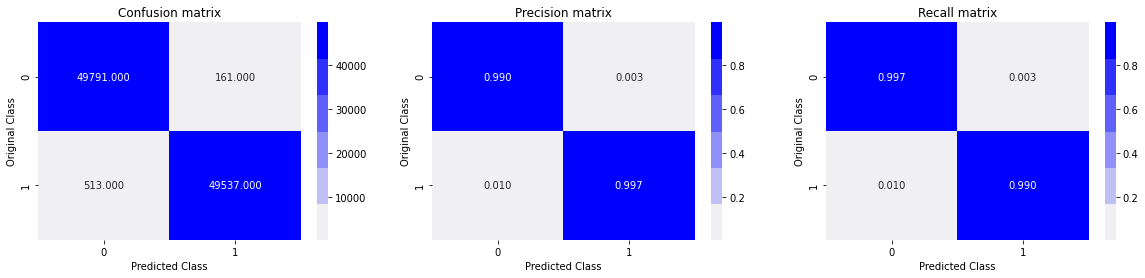

Test confusion_matrix


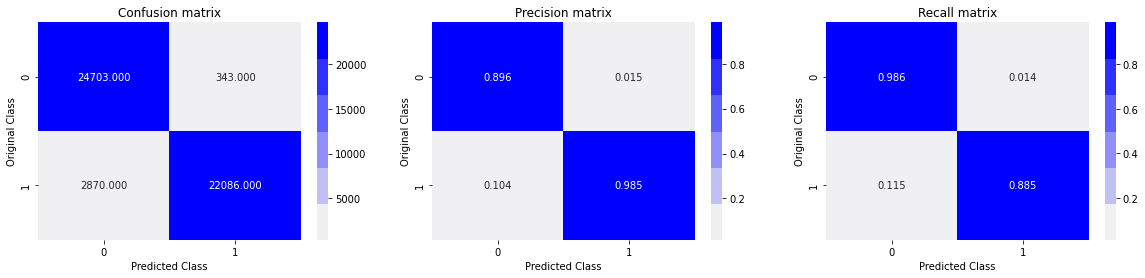

In [33]:
print('Train confusion_matrix')
plot_confusion_matrix(y_train,y_train_pred)
print('Test confusion_matrix')
plot_confusion_matrix(y_test,y_test_pred)

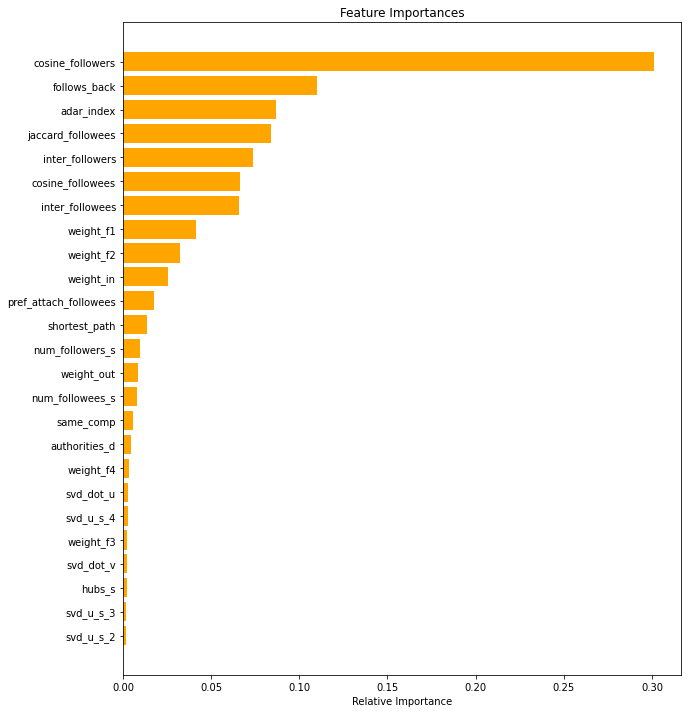

In [34]:
features = df_final_train.columns
importances = final_clf.feature_importances_
indices = (np.argsort(importances))[-25:]
plt.figure(figsize=(10,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='orange', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

## Summary

### step-by-step approach to solve this problem

In [ ]:
# step-by-step approach to solve this problem

Probelm definition:
        Given Social Network (Facebook) dataset with the 2 columns as (user_i, user_j) and stated that all u_i and u_j are friends as per the
        snapshot data that has been given to us. Note: Timestamp is not provided here.

Mapping given problem to ML problem:
        We have to predict the link betwen the users (u_i and u_j). Whether we should recommend u_i to u_j
        Sample data : u_i , u_j = 1 means u_i is following u_j
        Here u_i is called Source and u_j is called Destination
        So, Here we are solving a classification problem here 
        Link Prediction --> Supevised Learning --> Binary classification problem

Approach: 
        Considering the given train.csv and converting it into graph data structure to solve the problem by generating the features using 
        graph theory based concepts like pagerank, Adamic/Adar index, Kartz centrality, preferential attachment etc.,
        Here each user will be a node and if the presence of link between them indicates the friendship yes/node
        u_i,u_j = Source_node,Destination_node

Data prepartion:
        All the given pairs has links between them so their response label would be 1 (Link : Yes)
        If the link link is not present btw the two nodes then that pair opf nodes are provided label 0  (Link : No )

        Observations:
                As we see there is u_i,u_j and u_j,u_i pair in the dataset, that means we have Directed graph here
                So assuming the Follower and Followee concept to solve it further.

Choosing performance metric:
        We have to predict the link between the users more precisely. Our metric would precision and Recall. So we are chosing F1_score as 
        our metric as it is large only when both precision and recall are high

Exploratory Data analysis:
        Performed thorough data analysis to understand the data that is provided. As not much features are provided to us we could not
        get more insights from the features which can help us to classify the data
        directly to separate the data.

Splitting data:
        We know that the data provided to us is not temporal in nature. So the data is splitted randomly and No of samples are reduced 
        taking computational power and time into consideration.

Major Task (Feature Engineering):
        Our main goal here is to extract the features with the help of data that is in x_train which has only 2 columns in it(Source and Destination). 
        We have to come up with graph based feature engineering techniques to the given user nodes.

Feature Engineering:
        Node based topological similarity (local):
                Cosine Simalrity 
                Jaccard’s Coefficient
                Adamic/Adar
                Preferential Attachment
        Path based topological similarity (global)
                Katz
                Hits score
                PageRank
                Connected_components
        SVD features using Adjacency Matrix A
                in which each element A_ij in A is a binary value
                A_ij = 1 : if u_i is following u_j are friends else: 0
                Each node will have feature vector now. With the K-dimension.
        Weight features:
                All These features are gathered from the refrences from a paper which helps us to solve the link prediction problem easily.
                http://be.amazd.com/link-prediction/    
                https://storage.googleapis.com/kaggle-forum-message-attachments/2594/supervised_link_prediction.pdf

Modeling:
        Applying proper MachineLearning algorithms like XGBoost , RandomForest etc.., to solve this classification pblm
        Hyperparam tuning is done accordingly.

Model evaluation:
        Train and Test consfusion matrices are plotted along with their precision and recall matrices which helps us to evaluate the performace
        of our model efficiently and F1 Scores are also computed for both train and test datasets. 
        There is no Overfitting of the data as there is not significant change in the train and test metric scores.
